In [4]:
import trottersuzuki as ts
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math

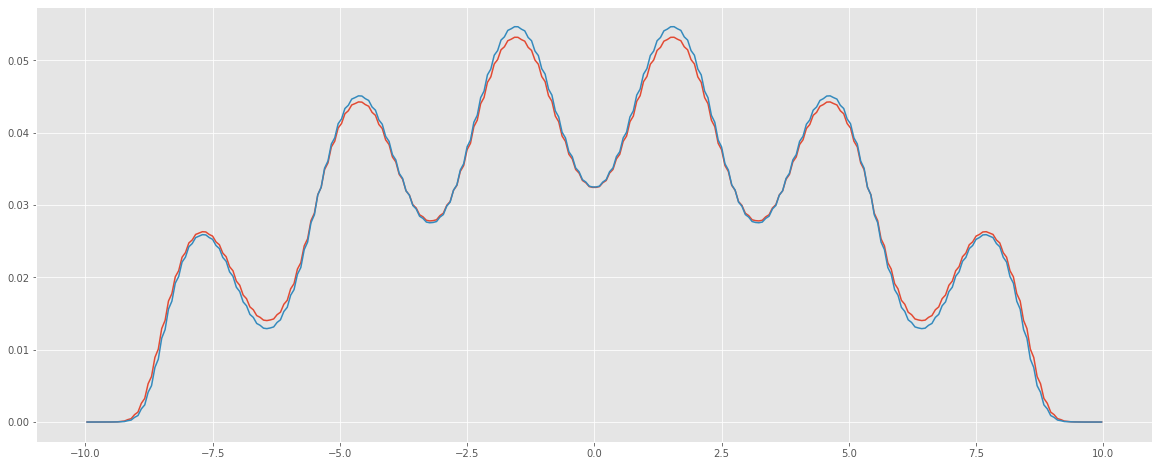

In [7]:
grid = ts.Lattice1D(300, 20.)  # Define the simulation's geometry
state_1 = ts.GaussianState(grid, 1.)  # Create first-component system's state
state_2 = ts.GaussianState(grid, 1.)  # Create second-component system's state
coupling_1 = 103
coupling_12 = 100
coupling_2 = 97

def potential(x,y):
    return 0.5*(x**2)+ 24 * (math.cos(x))**2 # Create harmonic potential

pot1 = ts.Potential(grid)
pot1.init_potential(potential)
pot2 = ts.Potential(grid)
pot2.init_potential(potential)
hamiltonian = ts.Hamiltonian2Component(grid, pot1, pot2, _coupling_a=coupling_1,
                                       coupling_ab=coupling_12,
                                      _coupling_b=coupling_2, _omega_r=-1)
solver = ts.Solver(grid, state_1, hamiltonian, 1e-2, State2=state_2)  # Create the solver
solver.evolve(20000, True)
plt.figure(figsize=(20, 8))
plt.plot(grid.get_x_axis(), state_1.get_particle_density()[0])
plt.plot(grid.get_x_axis(), state_2.get_particle_density()[0])